In [2]:
import numpy as np
import scipy
from scipy import misc
from skimage.transform import radon, iradon,iradon_sart, rotate
from skimage.draw import line_aa
import cv2

from PIL import Image
from PIL import ImageDraw
import matplotlib.pyplot as plt
import sewar
from matplotlib import pyplot as plt
%matplotlib inline

In [104]:
img = cv2.imread("../images/lamp4_full.png",0)
img = cv2.resize(img,(480,480))
# img = cv2.GaussianBlur(img,(5,5),0)
# img = cv2.equalizeHist(img) 
# img = cv2.Canny(img,100,200)

# imgo = np.copy(img)
rows,cols = img.shape
M = np.float32([[1,0,50],[0,1,0]])
# img = cv2.warpAffine(img,M,(cols,rows))
# img[:,0:50] = imgo[:,:430:480]
# img = rotate(img, 23,resize=True)
# img = cv2.resize(img,(480,480))

imgo = np.copy(img)
# img = np.ones((480,480), dtype='uint8')*255
imsize = img.shape
print(imsize)

(480, 480)


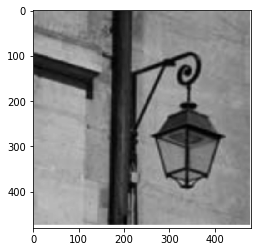

In [105]:
plt.imshow(img, cmap='gray')

In [94]:

orb = cv2.ORB_create()
kp = orb.detect(img,None)
kp, des = orb.compute(img, kp)


Num of keypts  455


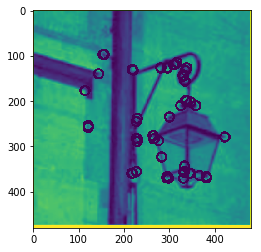

(<matplotlib.image.AxesImage at 0x125f5c208>, None)

In [107]:
img = np.copy(imgo)
print('Num of keypts ',len(kp))
for i in range(50):
#     print(kp[i].pt)
    cv2.circle(img,(int(kp[i].pt[0]),int(kp[i].pt[1])),10 , (0,0,0), 3)
plt.imshow(img),plt.show()

(480, 36)


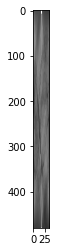

In [96]:
theta1 = np.linspace(0., 180., 36, endpoint=False)
# print(theta1)
sinogram1 = radon(img, theta=theta1, circle=True)
plt.imshow(sinogram1, cmap='gray')
imsize = sinogram1.shape
print(imsize)

-1.258252761241844e-16
1.0000000000000002
(480,)


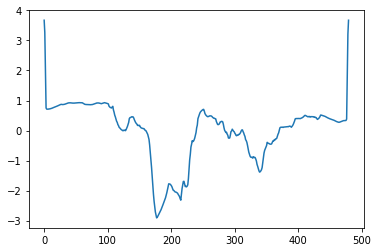

177
idx:  200 val:  -1.8311044336380495
idx:  201 val:  -1.8689011834564473
idx:  202 val:  -1.927272310851832
idx:  203 val:  -1.984718747120161
idx:  204 val:  -1.9950637291040958
idx:  205 val:  -2.019914803143715
idx:  206 val:  -2.042454149365695
idx:  207 val:  -2.0486380212778794
idx:  208 val:  -2.0559199639034422
idx:  209 val:  -2.0716975062588285
idx:  210 val:  -2.0871860826370097
idx:  211 val:  -2.130068633654213
idx:  212 val:  -2.160814613628812
idx:  213 val:  -2.200634125287644
idx:  214 val:  -2.2655358837678587
idx:  215 val:  -2.3184166575963507
idx:  216 val:  -2.1213418611426262
idx:  217 val:  -1.9352477718226866
idx:  218 val:  -1.804692943321524
idx:  219 val:  -1.6970242202149874
idx:  220 val:  -1.6908981414982442
idx:  221 val:  -1.781402285558811
idx:  222 val:  -1.864855659775579
idx:  223 val:  -1.8572847511728112
idx:  224 val:  -1.8757785737139232
idx:  225 val:  -1.851100879260627
idx:  226 val:  -1.8076403962890137
idx:  227 val:  -1.6017810341282606

In [97]:
b = sinogram1[:,0]
b = (b - np.mean(b))/np.std(b)
# b = (b - np.min(b))
# b = b/np.max(b)
print(np.mean(b))
print(np.var(b))
# b[259] = b[259]*2
print(b.shape)
# print(b)
# print(np.mean(b))
plt.plot(b) # plotting by columns
plt.show()
min_idxb = np.argmin(b)
print(min_idxb)
for i in range(200,300):
    print('idx: ',i, 'val: ',b[i])

In [98]:
min_angles = []
    
b = sinogram1[:,0]
b = (b - np.mean(b))/np.std(b)
#     b = (b - np.min(b))
#     b = b/np.max(b)
conv_sz = 101
ans = np.zeros(np.shape(b)[0])
#     for i in range(len(conv_sz)):
for i in range(1):        
    idx = 232
    ans[idx]=0
    for j in range(50):
        l_term = b[idx - 50 + j]
        r_term = b[idx + 50 - j]
        mean = (l_term + r_term)/2
        diff = np.abs(l_term - r_term)/mean 
        print('idx: ',j,'lterm ',l_term,'r_term ',r_term,'diff ',diff)
#         if j>19:
        ans[idx] = ans[idx] + diff
    print(ans[idx])

idx:  0 lterm  -2.719096881588631 r_term  0.2054121873110283 diff  -2.3268702519113056
idx:  1 lterm  -2.6762143305714274 r_term  0.2885188023551504 diff  -2.483342702527383
idx:  2 lterm  -2.633273986358783 r_term  0.3028515148245122 diff  -2.5198225103367204
idx:  3 lterm  -2.5810289376801414 r_term  0.30527882903303316 diff  -2.5365770659495053
idx:  4 lterm  -2.5257786428385693 r_term  0.2885188023551504 diff  -2.515843170532768
idx:  5 lterm  -2.4680432405930355 r_term  0.2851090038241329 diff  -2.5224326029099995
idx:  6 lterm  -2.410885770301911 r_term  0.23419319864063387 diff  -2.430365227850059
idx:  7 lterm  -2.3533815408381407 r_term  0.20633687843808393 diff  -2.384410966481586
idx:  8 lterm  -2.2941435155111414 r_term  0.19732113994929182 diff  -2.37641937104266
idx:  9 lterm  -2.2368704588291353 r_term  0.2005575588939864 diff  -2.3939621634776733
idx:  10 lterm  -2.158502885811173 r_term  0.2542474374586522 diff  -2.534061620101686
idx:  11 lterm  -2.072795576972207 r_t

In [99]:
min_angles = []
    
b = sinogram1[:,17]
b = (b - np.mean(b))/np.std(b)
#     b = (b - np.min(b))
#     b = b/np.max(b)
conv_sz = [101]
ans = np.zeros(np.shape(b)[0])
#     for i in range(len(conv_sz)):
for i in range(1):        
    idx = 237
    ans[idx]=0
    for j in range(50):
        l_term = b[idx - 50 + j]
        r_term = b[idx + 50 - j]
        mean = (l_term + r_term)/2
        diff = np.abs(l_term - r_term)/mean 
        print('idx: ',j,'lterm ',l_term,'r_term ',r_term,'diff ',diff)
#         if j>19:
        ans[idx] = ans[idx] + diff
    print(ans[idx])

idx:  0 lterm  -0.017340741849188362 r_term  -0.06795814661361506 diff  -1.1868244868513051
idx:  1 lterm  -0.18850346360173023 r_term  -0.1133000304520425 diff  -0.4983602551419676
idx:  2 lterm  -0.2685890040884221 r_term  -0.160866287487299 diff  -0.5016713903134178
idx:  3 lterm  -0.28346573415074433 r_term  -0.2724592830364967 diff  -0.03959689085386334
idx:  4 lterm  -0.3069188703315828 r_term  -0.24625406178595602 diff  -0.2193339732419759
idx:  5 lterm  -0.3380615685019127 r_term  -0.21003438425142204 diff  -0.46717069742023093
idx:  6 lterm  -0.3592502521610699 r_term  -0.1957661199149034 diff  -0.5891146296628095
idx:  7 lterm  -0.3912427921689736 r_term  -0.14885377230272337 diff  -0.8975766031889
idx:  8 lterm  -0.4313086276451939 r_term  -0.039379174500569464 diff  -1.6653478223055849
idx:  9 lterm  -0.4942568592233019 r_term  -0.013838880094231436 diff  -1.8910529727108547
idx:  10 lterm  -0.5944959674153105 r_term  0.01804872935827584 diff  -2.1252411542059644
idx:  11 l

In [100]:
min_angles = []
for k in range(36):
    
    b = sinogram1[:,k]
    b = (b - np.mean(b))/np.std(b)
#     b = (b - np.min(b))
#     b = b/np.max(b)
    conv_sz = 101
    cb2 = int(conv_sz/2)
    ans = np.zeros(np.shape(b)[0])
#     for i in range(len(conv_sz)):
    for i in range(cb2):        
        idx = 220 + i
        for j in range(cb2):
            l_term = b[idx - cb2 + j]
            r_term = b[idx + cb2 - j]
            mean = (l_term + r_term)/2
            diff = np.abs((l_term - r_term)/mean) 
            ans[idx] = ans[idx] + diff
        
    #restrict to center
#     ans_m = ans
    ans_m = ans[220:260]
    center = np.argmin(ans_m)+220
    min_val = min(ans_m)
#     if center <230 or center > 250:
#         min_val = min_val*10000
        
    min_angles.append(min_val)
        
    print('angle: ',k,'Val: ',min_val,'At arg: ',center)
    # print(np.shape(ans))
#     print(np.argmin(ans))


angle:  0 Val:  103.01896644086251 At arg:  259
angle:  1 Val:  98.76823203314453 At arg:  259
angle:  2 Val:  104.81677176086932 At arg:  220
angle:  3 Val:  46.0998573745793 At arg:  220
angle:  4 Val:  41.18681419717946 At arg:  220
angle:  5 Val:  49.83528911030186 At arg:  259
angle:  6 Val:  160.40244669093823 At arg:  257
angle:  7 Val:  92.27159936965744 At arg:  259
angle:  8 Val:  119.92206749514322 At arg:  255
angle:  9 Val:  70.33977504881564 At arg:  220
angle:  10 Val:  50.04865674156826 At arg:  220
angle:  11 Val:  53.25681102532128 At arg:  227
angle:  12 Val:  30.197926237386355 At arg:  255
angle:  13 Val:  58.220111382177585 At arg:  259
angle:  14 Val:  139.0177713567903 At arg:  258
angle:  15 Val:  83.51957093490392 At arg:  259
angle:  16 Val:  44.202678868201666 At arg:  222
angle:  17 Val:  36.10759646079722 At arg:  220
angle:  18 Val:  68.1020358043001 At arg:  226
angle:  19 Val:  164.24115183315925 At arg:  225
angle:  20 Val:  92.08777136816254 At arg:  

In [101]:
# print(min_angles)
print(np.argmin(min_angles))
# for h in range(180):
#     if min_angles[h]<91000:
#         print(h)
#         print(min_angles[h])

27


(480, 480)


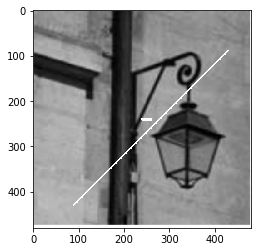

In [103]:
ang = 27*5
sym_pt = 259

print(np.shape(imgo))
img = np.copy(imgo)
# img = cv2.resize(img,(64,64))
for i in range(1):    
    c0 = np.rint(240*np.cos(((180-ang)/180)*3.14)).astype(int)
    s0 = np.rint(240*np.sin(((180-ang)/180)*3.14)).astype(int)
#     print(s0)
#     print(c0)
    img = cv2.line(img,(sym_pt + s0,sym_pt - c0),(sym_pt - s0,sym_pt + c0),(255,255,255),3)
    img = cv2.line(img,(240,240),(260,240),(255,255,255),5)
    plt.imshow(img, cmap='gray')




In [105]:
sinogram1t = np.flipud(sinogram1)
diff = np.abs(sinogram1 - sinogram1t)
diff_col = np.mean(diff,axis=0)
print(diff_col)
print(np.shape(diff_col))
min_idx = np.argmin(diff_col)
print(min_idx)

[ 3976.01666667  4191.71258687  4390.57023427  4571.00735922
  4819.85104967  5155.7738808   5524.04136161  5960.92225905
  6412.61780278  6854.12814583  7315.26531394  7792.32931493
  8291.00963541  8757.19891513  9122.43692011  9426.26529559
  9668.67257699  9857.85738166 10012.55180051 10134.8514526
 10250.04765549 10330.8580199  10338.2641037  10267.96035808
 10178.29600978 10138.72924578 10154.91963661 10291.34170646
 10496.95542724 10780.01792859 11168.91496394 11614.83762229
 11983.19209268 12346.08578539 12706.70264915 13059.67942644
 13459.88201998 13983.54800665 14494.30571259 14988.28479531
 15414.69913159 15768.13763891 16122.47832632 16544.5114069
 17163.53416664 17840.15475335 18616.96438118 19714.52290579
 20714.21304127 21486.89907365 21979.00339519 22334.06706465
 22664.26323869 22981.78467825 23166.97528517 23004.42447296
 22733.29109423 22443.92144696 22127.54854038 21721.28793564
 21112.85731594 20263.46871942 19273.0770251  18489.36710366
 18026.1731727  17536.6598

In [190]:
count = 0
d = np.zeros(30)
for i in range(1,179):
    if(diff_col[i] < diff_col[i-1] and diff_col[i] < diff_col[i+1] and diff_col[i]<diff_col[min_idx] *5):
        print(i)
        d[count]=i
        count=count+1;
print("count", count)

5
54
123
171
176
count 5


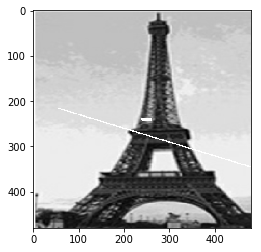

In [266]:
img = cv2.imread("../images/ball90.png",0)
ang = 73
sym_pt = 286
img = np.copy(imgo)
img = cv2.resize(img,(480,480))
for i in range(1):    
    c0 = np.rint(240*np.cos(((180-ang)/180)*3.14)).astype(int)
    s0 = np.rint(240*np.sin(((180-ang)/180)*3.14)).astype(int)
#     print(s0)
#     print(c0)
    img = cv2.line(img,(sym_pt + s0,sym_pt - c0),(sym_pt - s0,sym_pt + c0),(255,255,255),2)
    img = cv2.line(img,(240,240),(260,240),(255,255,255),5)
    plt.imshow(img, cmap='gray')




In [271]:
# img = np.copy(imgo)
# img = cv2.resize(img,(480,480))
# img = cv2.line(img,(240 + s0,240 - c0),(240 - s0,240 + c0),(0,0,0),5)
# img = cv2.line(img,(231,480),(231,0),(255,255,255),2)
# plt.imshow(img, cmap='gray')




In [61]:
a = [1, 2, 3, 4,3,2,3,5,6,7,1 ]
b = [1 ,0 ,-1]
c = np.convolve(a,b,mode='same')
print(c)

[ 2  2  2  0 -2  0  3  3  2 -5 -7]
